# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [37]:
column_dict = {}
for column in df.columns:
    column_dict[column] = column.lower()

df = df.rename(columns=column_dict)
df.head()#Your code here

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the Index to be the Line Names

In [38]:
df = df.set_index('linename')
df.head()#Your code here

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [39]:
df = df.reset_index()
df.head()# Your code here

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [46]:
df['Num_Lines'] = df.linename.map(lambda x: len(x))
df.sort_values(by=['Num_Lines'], ascending=False) # Your code here

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12
2676,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,04:00:00,REGULAR,2832359,3306438,12
2677,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,08:00:00,REGULAR,2832561,3306716,12
2678,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,09:57:08,REGULAR,2832815,3307705,12
2679,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,12:00:00,REGULAR,2832994,3308064,12
2680,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,16:00:00,REGULAR,2833390,3308536,12


## Write a function to clean a column name.

In [54]:
def clean(col_name):
    cleaned = col_name.strip()#Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [55]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [56]:
#Checking the output, we can see the results.
df.columns

Index(['Linename', 'C/A', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time',
       'Desc', 'Entries', 'Exits', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

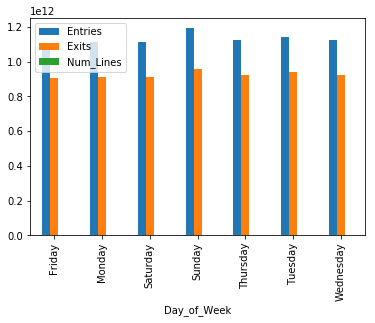

In [90]:
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y')
df['Day_of_Week'] = df.Date.dt.day_name()

traffic_by_day_of_week = df.groupby('Day_of_Week').sum()

traffic_by_day_of_week.plot(kind='bar')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [96]:
df['Weekend'] = df.Day_of_Week.map({'Monday': False, 'Tuesday': False, 'Wednesday': False, 'Thursday': False, 'Friday': False, 'Saturday': True, 'Sunday': True})
wkend = df.groupby('Weekend').sum()
print(wkend)
#There are more entries, exits and lines running on weekdays than on weekends (although Sunday has the most of all days)

               Entries          Exits  Num_Lines
Weekend                                         
False    5614154250681  4602290732124     381306
True     2307967724596  1868365831935     150031


# Drop a couple of columns

In [99]:
df = df.drop(['Scp', 'Unit'], axis=1)
df.head()# Your code here

,Linename,C/A,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines,Day_of_Week,Weekend
0,NQR456W,A002,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday,True
1,NQR456W,A002,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday,True
2,NQR456W,A002,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday,True
3,NQR456W,A002,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday,True
4,NQR456W,A002,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday,True
